# Analisis Penjualan Mobil Toyota

In [34]:
# Import pustaka
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya untuk visualisasi
sns.set(style='whitegrid')

In [35]:
# Muat dataset
data = pd.read_csv('penjualan_mobil_toyota.csv')

In [36]:
# Tampilkan informasi data
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Bulan      149 non-null    object
 1   Penjualan  149 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


,Bulan,Penjualan
0,2011-01,27619
1,2011-02,25532
2,2011-03,32275
3,2011-04,21128
4,2011-05,19554
...,...,...
144,2023-01,28970
145,2023-02,27336
146,2023-03,29471
147,2023-04,21518


In [37]:
# Tampilkan statistik deskriptif
data['Penjualan'].describe()

count      149.000000
mean     28402.845638
std       7579.399557
min        695.000000
25%      25081.000000
50%      29362.000000
75%      33344.000000
max      40781.000000
Name: Penjualan, dtype: float64

In [38]:
# Ekstrak tahun dari kolom 'Bulan'
data['Tahun'] = data['Bulan'].str[:4].astype(int)

# Konversi kolom 'Bulan' menjadi datetime
data['Bulan'] = pd.to_datetime(data['Bulan'], format='%Y-%m')

# Set kolom 'Bulan' sebagai index
data.set_index('Bulan', inplace=True)

# Tampilkan data untuk memastikan konversi berhasil
data.head()


,Penjualan,Tahun
Bulan,,
2011-01-01,27619,2011
2011-02-01,25532,2011
2011-03-01,32275,2011
2011-04-01,21128,2011
2011-05-01,19554,2011


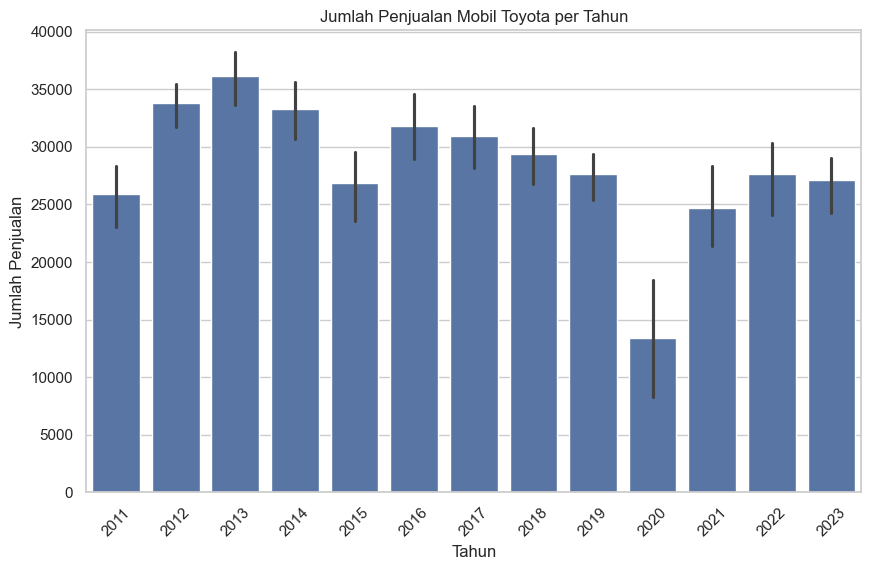

In [39]:
# Visualisasi data penjualan berdasarkan tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='Tahun', y='Penjualan', data=data.reset_index())
plt.title('Jumlah Penjualan Mobil Toyota per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.show()


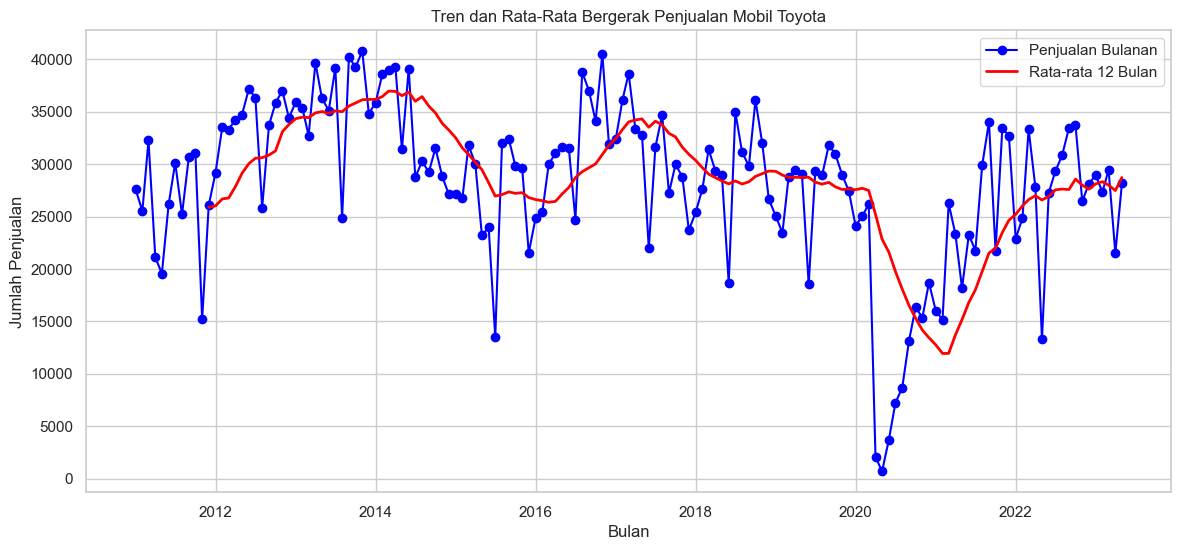

In [40]:
# Tambahkan kolom moving average 12 bulan
data['Moving_Average'] = data['Penjualan'].rolling(window=12).mean()

# Simpan plot terakhir sebagai gambar
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Penjualan'], label='Penjualan Bulanan', color='blue', marker='o')
plt.plot(data.index, data['Moving_Average'], label='Rata-rata 12 Bulan', color='red', linewidth=2)
plt.title('Tren dan Rata-Rata Bergerak Penjualan Mobil Toyota')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.grid(True)
plt.savefig('tren_penjualan_toyota.png')
plt.show()


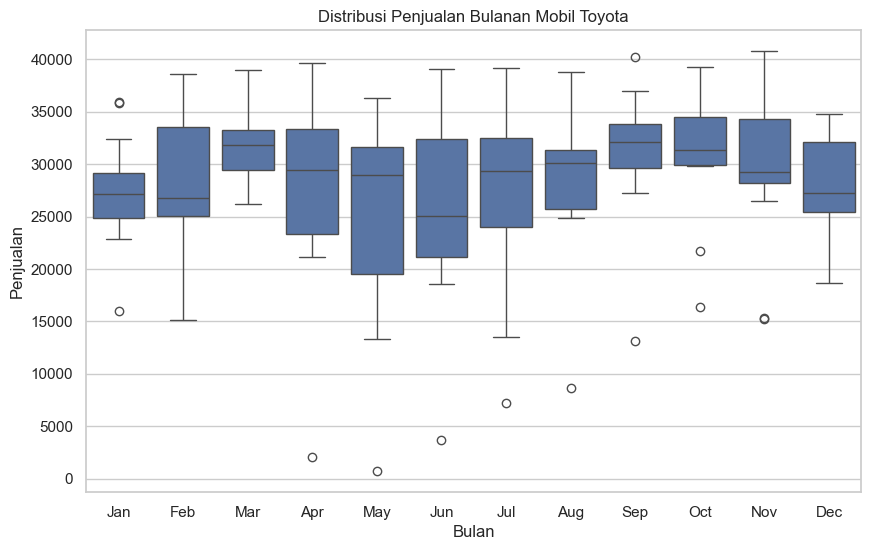

In [41]:
# Menambahkan kolom Bulan dalam bentuk string
data['Bulan_str'] = data.index.strftime('%b')

# Plot distribusi penjualan bulanan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bulan_str', y='Penjualan', data=data, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Distribusi Penjualan Bulanan Mobil Toyota')
plt.xlabel('Bulan')
plt.ylabel('Penjualan')
plt.show()


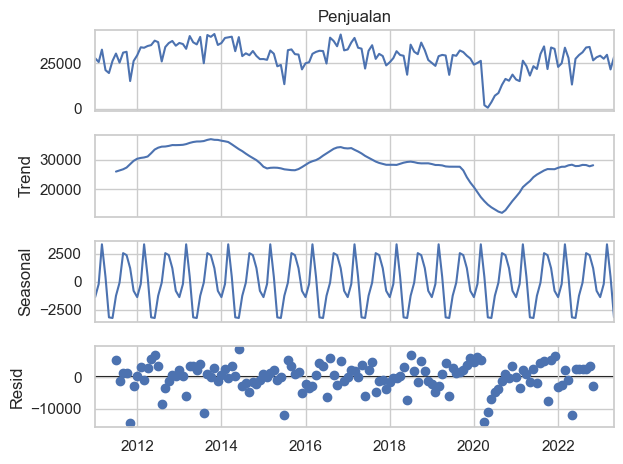

In [42]:
# Seasonal Decomposition (Optional)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Penjualan'], model='additive', period=12)
decomposition.plot()
plt.show()

In [43]:
# Calculate and display some statistics
print("Average Sales:", data['Penjualan'].mean())
print("Total Sales:", data['Penjualan'].sum())

Average Sales: 28402.845637583894
Total Sales: 4232024
